In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading and viewing data

In [304]:
data = pd.read_csv('./titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [305]:
len(data)

891

In [306]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [307]:
data["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [308]:
data[["Name", "Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [309]:
print(sum(data['Survived']),'passengers survived out of',len(data))

342 passengers survived out of 891


# Dropping a column of data

In [310]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [311]:
sum(data['Cabin'].isna())

687

In [312]:
len(data['Cabin'])

891

In [313]:
data = data.drop('Cabin', axis=1)

In [314]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Filling in non-existing values

In [315]:
for col in data.columns:
    num_na = sum(data[col].isna())
    print(col, 'column has', num_na, 'undefined values.')

PassengerId column has 0 undefined values.
Survived column has 0 undefined values.
Pclass column has 0 undefined values.
Name column has 0 undefined values.
Sex column has 0 undefined values.
Age column has 177 undefined values.
SibSp column has 0 undefined values.
Parch column has 0 undefined values.
Ticket column has 0 undefined values.
Fare column has 0 undefined values.
Embarked column has 2 undefined values.


In [316]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [317]:
median_age = data["Age"].median()
median_age

28.0

In [318]:
data["Age"] = data["Age"].fillna(median_age)

In [319]:
data["Embarked"] = data["Embarked"].fillna('U')

In [320]:
for col in data.columns:
    num_na = sum(data[col].isna())
    print(col, 'column has', num_na, 'undefined values.')

PassengerId column has 0 undefined values.
Survived column has 0 undefined values.
Pclass column has 0 undefined values.
Name column has 0 undefined values.
Sex column has 0 undefined values.
Age column has 0 undefined values.
SibSp column has 0 undefined values.
Parch column has 0 undefined values.
Ticket column has 0 undefined values.
Fare column has 0 undefined values.
Embarked column has 0 undefined values.


# Scaling and centering data

In [292]:
data[['Fare', 'Pclass']]

,Fare,Pclass
0,7.2500,3
1,71.2833,1
2,7.9250,3
3,53.1000,1
4,8.0500,3
...,...,...
886,13.0000,2
887,30.0000,1
888,23.4500,3
889,30.0000,1


Text(0, 0.5, 'Age')

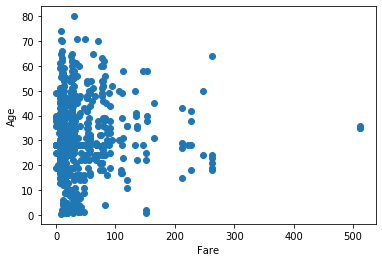

In [293]:
plt.scatter(data["Fare"], data["Age"])
plt.xlabel('Fare')
plt.ylabel('Age')

(0, 500)

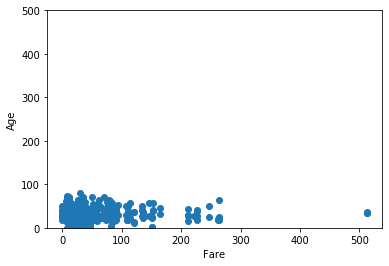

In [294]:
plt.scatter(data["Fare"], data["Age"])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.ylim(0,500)

In [295]:
print(max(data["Fare"]))
print(max(data["Age"]))

512.3292
80.0


In [296]:
max_fare = max(data["Fare"])
data["Normalized_fare"] = data["Fare"]/max_fare

max_age = max(data["Age"])
data["Normalized_age"] = data["Age"]/max_age

In [297]:
mid_fare = (max(data["Fare"]) - min(data["Fare"]))/2
data["Centered_Normalized_Fare"] = (data["Fare"] - mid_fare)/(max(data["Fare"]) - mid_fare)

mid_age = (max(data["Age"]) - min(data["Age"]))/2
data["Centered_Normalized_Age"] = (data["Age"] - mid_age)/(max(data["Age"]) - mid_age)

data = data.drop(['Fare', 'Age', 'Normalized_fare', 'Normalized_age'], axis=1)

In [298]:
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Centered_Normalized_Fare,Centered_Normalized_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,-0.971698,-0.442427
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,-0.721729,-0.044516
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,-0.969063,-0.342950
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,-0.792711,-0.119125
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,-0.968575,-0.119125
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,S,-0.949251,-0.318080
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,S,-0.882888,-0.517036
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,S,-0.908457,-0.293211
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,C,-0.882888,-0.342950


In [302]:
data.to_csv('./cleaned_titanic_data.csv')

# One-hot encoding

In [299]:
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Centered_Normalized_Fare,Centered_Normalized_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,-0.971698,-0.442427
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,-0.721729,-0.044516
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,-0.969063,-0.342950
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,-0.792711,-0.119125
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,-0.968575,-0.119125
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,S,-0.949251,-0.318080
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,S,-0.882888,-0.517036
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,S,-0.908457,-0.293211
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,C,-0.882888,-0.342950


In [242]:
gender_columns = pd.get_dummies(data['Sex'], prefix='Sex')
print(gender_columns)
embarked_columns = pd.get_dummies(data["Pclass"], prefix="Pclass")
print(embarked_columns)

     Sex_female  Sex_male
0             0         1
1             1         0
2             1         0
3             1         0
4             0         1
..          ...       ...
886           0         1
887           1         0
888           1         0
889           0         1
890           0         1

[891 rows x 2 columns]
     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           1         0         0
2           0         0         1
3           1         0         0
4           0         0         1
..        ...       ...       ...
886         0         1         0
887         1         0         0
888         0         0         1
889         1         0         0
890         0         0         1

[891 rows x 3 columns]


In [243]:
data = pd.concat([data, gender_columns], axis=1)
data = pd.concat([data, embarked_columns], axis=1)

In [244]:
data = pd.concat([data, gender_columns], axis=1) 
data = pd.concat([data, embarked_columns], axis=1)

In [245]:
data = data.drop(['Sex', 'Embarked'], axis=1)

In [246]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Normalized_fare,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.014151,...,0,1,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.139136,...,1,0,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.015469,...,1,0,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.103644,...,1,0,1,0,0,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.015713,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0.025374,...,0,1,0,1,0,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0.058556,...,1,0,1,0,0,1,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0.045771,...,1,0,0,0,1,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0.058556,...,0,1,1,0,0,0,1,1,0,0


# Data Binning

In [247]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(data['Age'], bins)
data['Categorized_age'] = categorized_age
data = data.drop(["Age"], axis=1)
data

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Normalized_fare,Normalized_age,...,Sex_male,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Categorized_age
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.014151,0.2750,...,1,0,0,1,0,1,0,0,1,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,0.139136,0.4750,...,0,1,0,0,1,0,1,0,0,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.015469,0.3250,...,0,0,0,1,1,0,0,0,1,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0.103644,0.4375,...,0,1,0,0,1,0,1,0,0,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,0.015713,0.4375,...,1,0,0,1,0,1,0,0,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,0.025374,0.3375,...,1,0,1,0,0,1,0,1,0,"(20, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0.058556,0.2375,...,0,1,0,0,1,0,1,0,0,"(10, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0.045771,0.3500,...,0,0,0,1,1,0,0,0,1,"(20, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,0.058556,0.3250,...,1,1,0,0,0,1,1,0,0,"(20, 30]"


In [248]:
cagegorized_age_columns = pd.get_dummies(data['Categorized_age'], prefix='Categorized_age')
data = pd.concat([data, cagegorized_age_columns], axis=1)
data = data.drop(['Categorized_age'], axis=1)
data

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Normalized_fare,Normalized_age,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0.014151,0.2750,...,0,1,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,0.139136,0.4750,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.015469,0.3250,...,0,1,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0.103644,0.4375,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,0.015713,0.4375,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,0.025374,0.3375,...,1,0,0,0,1,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0.058556,0.2375,...,0,0,0,1,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0.045771,0.3500,...,0,1,0,0,1,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,0.058556,0.3250,...,0,0,0,0,1,0,0,0,0,0


# Feature selection

In [474]:
data = data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
data

,Survived,Age,SibSp,Parch,Normalized_fare,Normalized_age,Centered_Normalized_Fare,Centered_Normalized_Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Pclass_C,Pclass_Q,Pclass_S,Pclass_U
0,0,22.0,1,0,0.014151,0.2750,-0.971698,-0.442427,0,1,0,0,1,0,0,1,0
1,1,38.0,1,0,0.139136,0.4750,-0.721729,-0.044516,1,0,1,0,0,1,0,0,0
2,1,26.0,0,0,0.015469,0.3250,-0.969063,-0.342950,1,0,0,0,1,0,0,1,0
3,1,35.0,1,0,0.103644,0.4375,-0.792711,-0.119125,1,0,1,0,0,0,0,1,0
4,0,35.0,0,0,0.015713,0.4375,-0.968575,-0.119125,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,0.025374,0.3375,-0.949251,-0.318080,0,1,0,1,0,0,0,1,0
887,1,19.0,0,0,0.058556,0.2375,-0.882888,-0.517036,1,0,1,0,0,0,0,1,0
888,0,28.0,1,2,0.045771,0.3500,-0.908457,-0.293211,1,0,0,0,1,0,0,1,0
889,1,26.0,0,0,0.058556,0.3250,-0.882888,-0.342950,0,1,1,0,0,1,0,0,0


# Training and testing

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
features = data.drop(["Survived"], axis=1)
labels = data["Survived"]

In [477]:
print("Features")
print(features.head())
print("=======")
print("Labels")
print(labels.head())

Features
    Age  SibSp  Parch  Normalized_fare  Normalized_age  \
0  22.0      1      0         0.014151          0.2750   
1  38.0      1      0         0.139136          0.4750   
2  26.0      0      0         0.015469          0.3250   
3  35.0      1      0         0.103644          0.4375   
4  35.0      0      0         0.015713          0.4375   

   Centered_Normalized_Fare  Centered_Normalized_Age  Sex_female  Sex_male  \
0                 -0.971698                -0.442427           0         1   
1                 -0.721729                -0.044516           1         0   
2                 -0.969063                -0.342950           1         0   
3                 -0.792711                -0.119125           1         0   
4                 -0.968575                -0.119125           0         1   

   Pclass_1  Pclass_2  Pclass_3  Pclass_C  Pclass_Q  Pclass_S  Pclass_U  
0         0         0         1         0         0         1         0  
1         1         0    

In [478]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

In [479]:
print(len(features_train))
print(len(features_test))
print(len(labels_train))
print(len(labels_test))

712
179
712
179


# Training a model

In [480]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [481]:
lr_model.fit(features_train, labels_train)

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluating a model

In [482]:
lr_model.score(features_test, labels_test)

0.8379888268156425

In [483]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labels_predicted_lr = lr_model.predict(features_test)

print("Accuracy:", accuracy_score(labels_test, labels_predicted_lr))
print("Recall:", recall_score(labels_test, labels_predicted_lr))
print("Precision:", precision_score(labels_test, labels_predicted_lr))
print("F1-Score:", f1_score(labels_test, labels_predicted_lr))

Accuracy: 0.8379888268156425
Recall: 0.7702702702702703
Precision: 0.8260869565217391
F1-Score: 0.7972027972027972


In [484]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

dt_model.fit(features_train, labels_train)
labels_predicted_dt = dt_model.predict(features_test)

print("Accuracy:", accuracy_score(labels_test, labels_predicted_dt))
print("Recall:", recall_score(labels_test, labels_predicted_dt))
print("Precision:", precision_score(labels_test, labels_predicted_dt))
print("F1-Score:", f1_score(labels_test, labels_predicted_dt))

Accuracy: 0.7877094972067039
Recall: 0.7162162162162162
Precision: 0.7571428571428571
F1-Score: 0.736111111111111


# Grid search

In [338]:
from sklearn.svm import SVC
svm_model = SVC(kernel="rbf", gamma=0.01)

In [339]:
svm_model.fit(features_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [340]:
labels_predicted_svm = svm_model.predict(features_test)

print("Accuracy:", accuracy_score(labels_test, labels_predicted_svm))
print("Recall:", recall_score(labels_test, labels_predicted_svm))
print("Precision:", precision_score(labels_test, labels_predicted_svm))
print("F1-Score:", f1_score(labels_test, labels_predicted_svm))

Accuracy: 0.7932960893854749
Recall: 0.5217391304347826
Precision: 0.9
F1-Score: 0.6605504587155964


In [397]:
a=[1879,
1900,
1885,
1854,
1867]

In [398]:
sum(a)/len(a)

1877.0

In [399]:
1867/1900

0.9826315789473684

In [406]:
b=np.array(a)-1877
b

array([  2,  23,   8, -23, -10])

In [407]:
b/23

array([ 0.08695652,  1.        ,  0.34782609, -1.        , -0.43478261])

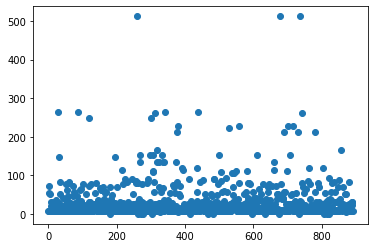

In [326]:
plt.scatter(range(len(data["Fare"])), data["Fare"])